<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

# Modeling Plan


- Model for Overall players
- Model for Foward position players
- Model for Midfielder postion players
- Model for Defense position plauyers
- Model for Goal Keepers

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>


In [1]:
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests
import pandas as pd
import bamboolib as bam

import unicodedata
import re
import json

import acquire

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression 

#statistical tests
from scipy import stats
from scipy.stats import pearsonr, spearmanr

from math import sqrt
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from bs4 import BeautifulSoup
import prepare
import plotly.express as px

#imports to show interactive visuals on github
import plotly.io as pio
pio.renderers

import modeling
import math
from math import sqrt

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

# `Acquire` Data.

In [2]:
df = acquire.get_fifa_data()
print("Row and column count:",df.shape)

Row and column count: (142079, 111)


<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

# Import [Prepare.py](https://github.com/Jules-Ray-Kayla-Bert-Capstone-FiFA/fifa/blob/main/prepare.py) File.
`Summary:`
    This file was created with the purpose of cleaning, encoding, scaling, dropping, and adding collumns to our existing data. It is necessary to complete this preperation step before we start exploring and modeling our data.

In [3]:
#defining df as our imported prepped data.
df = prepare.prepped_data(df)

Before dropping nulls, 142079 rows, 111 cols
After dropping nulls. 131489 rows. 66 cols
After cleaning the data and adding additional columns there are: 98804 rows. 84 cols


<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>


# Removing outliers

In [4]:
cols = ['overall'] 
df = modeling.handle_outliers(df,cols,1.5)

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

# Assigning positions for future position modeling 

In [5]:
#goalkeeper_df, forward_df, midfielder_df, defender_df = prepare.acquire_players_by_position(df)


# Overall Player Modeling

================================               OVERALL                 =====================================
splitting data
Train: 58250 rows, 84 cols
Validate: 26082 rows, 84 cols
Test: 13961 rows, 84 cols
=========================================== Model for Overall Data =========================================
The features that we will use for the model: ['international_reputation', 'overall', 'reactions', 'potential']
Baseline :  wage_eur    13733.682403
dtype: float64
RMSE using Mean
Train/In-Sample:  21934.77 
Validate/Out-of-Sample:  18374.57
RMSE using Median
Train/In-Sample:  23609.56 
Validate/Out-of-Sample:  18720.03
RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  11798.25116655849 
Validation/Out-of-Sample:  11743.292862987024
Lets take a look at the numbers:
train
       wage_eur  wage_eur_pred_mean  wage_eur_pred_median  wage_eur_pred_glm
213    200000.0        13733.682403                5000.0      174912.062867
214    180000.0        13733.682403   

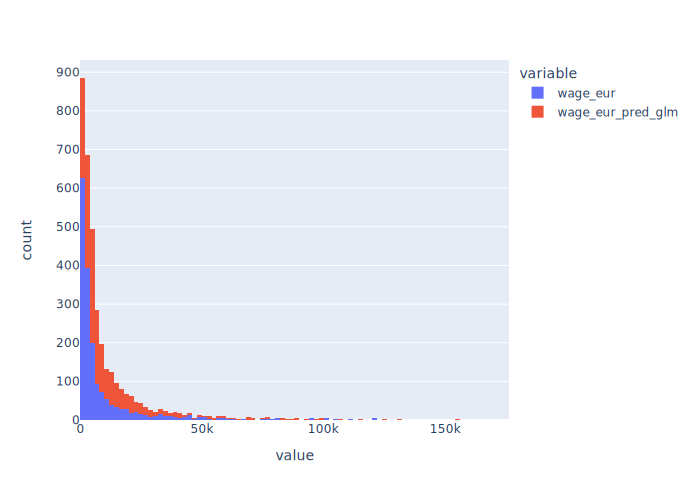

In [6]:
modeling.overall_modeling(df)

`Overall Takeaways & Summary:`
- Baseline to beat 13733.68
- Our GLM tweedie Model outperformed the rest of the models.
- Training/In-Sample:  11798.25
- Validation/Out-of-Sample:  11743.29
- on average with our in sample and out of sample prediction we came out at an average total of 11,770.77.
- In concluion that makes this model %16.7 more acurate then the baseline.


<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

***

# End of Overall Modeling, now to focus on `Forwards`.
***
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

================================               FORWARDS                  =====================================
splitting data
Train: 10750 rows, 84 cols
Validate: 4966 rows, 84 cols
Test: 2628 rows, 84 cols
=======================================        Model Data            =========================================
The features that we will use for the model: ['overall', 'shooting', 'ball_control']
Baseline :  wage_eur    14916.744186
dtype: float64
RMSE using Mean
Train/In-Sample:  23525.93 
Validate/Out-of-Sample:  20252.66
RMSE using Median
Train/In-Sample:  25159.04 
Validate/Out-of-Sample:  20694.2
RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  12779.16441245147 
Validation/Out-of-Sample:  13341.266950209661
Lets take a look at the numbers:
train
       wage_eur  wage_eur_pred_mean  wage_eur_pred_median  wage_eur_pred_glm
213    200000.0        14916.744186                6000.0      156231.564354
217    140000.0        14916.744186                6000.0      

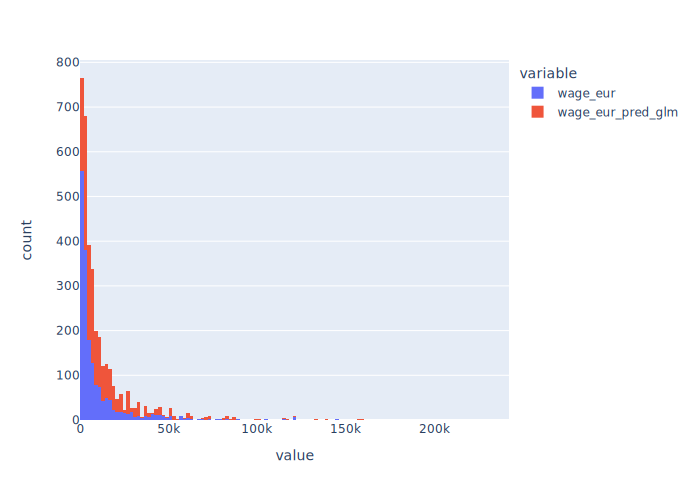

In [7]:
modeling.forwards_modeling(df)

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

***

# End of Forward Modeling, now to focus on `Midfielders`.
***
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

================================               MIDFIELDERS               =====================================
splitting data
Train: 21755 rows, 84 cols
Validate: 9657 rows, 84 cols
Test: 5093 rows, 84 cols
=======================================        Model Data            =========================================
The features that we will use for the model: ['international_reputation', 'overall', 'passing']
Baseline :  wage_eur    14382.09607
dtype: float64
RMSE using Mean
Train/In-Sample:  22529.56 
Validate/Out-of-Sample:  18913.37
RMSE using Median
Train/In-Sample:  24405.02 
Validate/Out-of-Sample:  19313.71
RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  11961.97106198305 
Validation/Out-of-Sample:  11588.235710091958
Lets take a look at the numbers:
train
       wage_eur  wage_eur_pred_mean  wage_eur_pred_median  wage_eur_pred_glm
215    150000.0         14382.09607                5000.0      112668.234321
216    130000.0         14382.09607                5

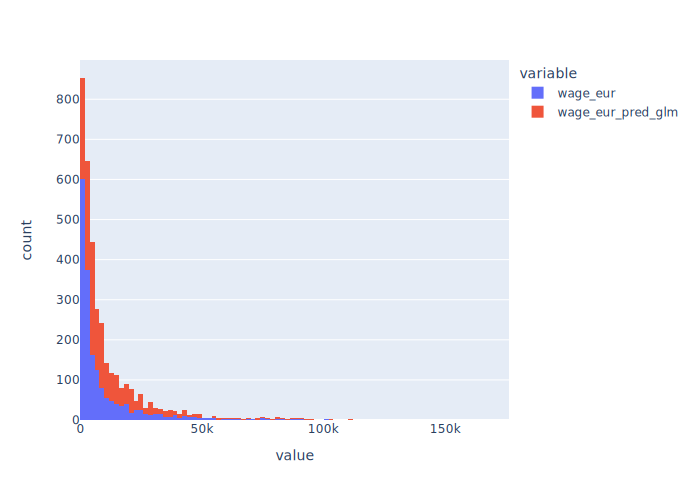

In [8]:
modeling.midfielder_modeling(df)

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

***

# End of Midfielders Modeling, now to focus on `Defenders`.
***
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

================================               DEFENDERS                 =====================================
splitting data
Train: 19007 rows, 84 cols
Validate: 8513 rows, 84 cols
Test: 4633 rows, 84 cols
=======================================        Model Data            =========================================
The features that we will use for the model: ['overall', 'defending']
Baseline :  wage_eur    13457.252591
dtype: float64
RMSE using Mean
Train/In-Sample:  21176.49 
Validate/Out-of-Sample:  18082.97
RMSE using Median
Train/In-Sample:  22802.82 
Validate/Out-of-Sample:  18457.23
RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  11034.793388765973 
Validation/Out-of-Sample:  10978.901776217468
Lets take a look at the numbers:
train
       wage_eur  wage_eur_pred_mean  wage_eur_pred_median  wage_eur_pred_glm
218    160000.0        13457.252591                5000.0       93509.937495
224     80000.0        13457.252591                5000.0       40733.404520

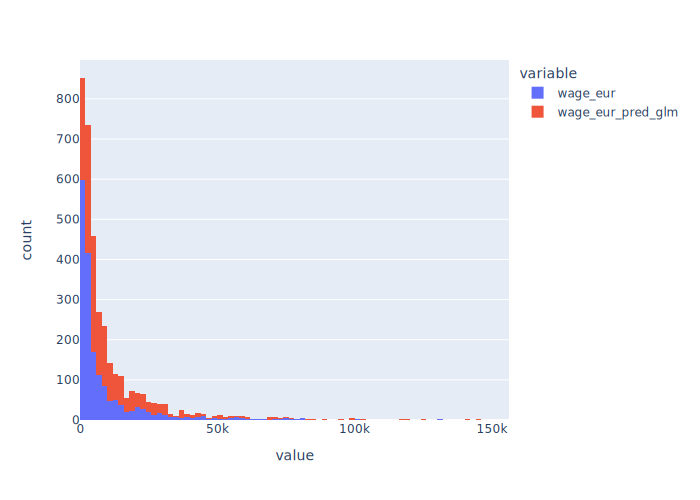

In [9]:
modeling.defender_modeling(df)

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

***

# End of Defenders Modeling, now to focus on `GoalKeepers`.
***
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>
<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

================================              GOAL KEEPER                =====================================
splitting data
Train: 6738 rows, 84 cols
Validate: 2946 rows, 84 cols
Test: 1607 rows, 84 cols
=======================================        Model Data            =========================================
The features that we will use for the model: ['overall', 'gk_reflexes']
RMSE using Mean
Train/In-Sample:  18934.09 
Validate/Out-of-Sample:  12877.09
RMSE using Median
Train/In-Sample:  20377.37 
Validate/Out-of-Sample:  12802.95
RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  10946.458538294037 
Validation/Out-of-Sample:  9913.011655055274
Lets take a look at the numbers:
train
       wage_eur  wage_eur_pred_mean  wage_eur_pred_median  wage_eur_pred_glm
214    180000.0         10532.42802                3000.0      102525.370222
454     50000.0         10532.42802                3000.0       26556.761759
687     80000.0         10532.42802                

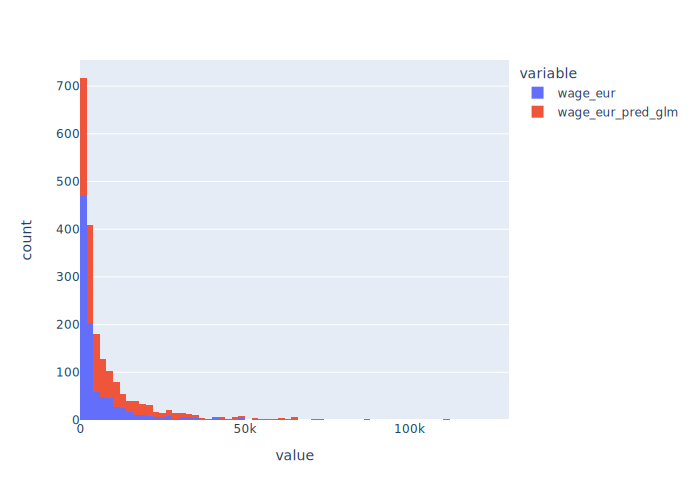

In [10]:
modeling.goalkeeper_modeling(df)

# End of Modeling